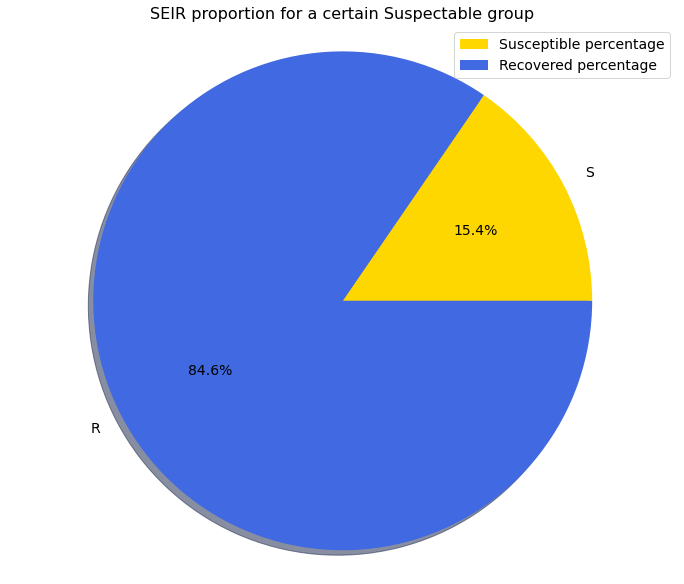

In [2]:
'''
parameter explain:
    Tinc is incubation period in days (in covid-19 it is usually 5.2 days )
    Tinf is infectious period in days (in covid-19 it is usually 2.3 days )
    R0 is the Reproduction Number (in covid-19 it is usually 2.2)
    sigma=1/Tinc
    gamma=1/Tinf
    beta= R0*gamma= R0/Tinf
'''

import matplotlib.pyplot as plt	
from scipy.integrate import solve_ivp
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import matplotlib.animation as animation
import tkinter as tk

'''
the inital value for the parameter:
    the number of days is 100
    beta is 2.2/2.3  beta= R0*gamma
    sigma is 1/5.2
    gamma is 1/2.3
'''

days=100  
beta=2.2/2.3
sigma=1/5.2
gamma=1/2.3
Tinc=5.2
Tinf=2.3
R0=2.2

''' 
this is the differential equation for seir model
this function will return the differential equation which will be solved later.
'''

def seir_m(t, y, beta, sigma, gamma):   
    S, E, I, R= y
    dSdt=-beta*I*S
    dEdt=-sigma*E+beta*I*S
    dIdt=-gamma*I+sigma*E
    dRdt=gamma*I
    return dSdt, dEdt, dIdt, dRdt

class interface:
    '''
    this interface class will generate two frames: frame 1 and frame 2 on the window.
    In frame 1, the user can select the enter the parameter they want to enter: 
        the number of days 
        beta
        sigma
        gamma
    then they can apply the change of the 
    In frame 2, the user can choose which type of garph to show. 
    if the button is clicked, a new window will appear to show the graph. 
    '''
    def __init__(self, master):
        # set the parameter that will be used in the window, it will be updated 
        # if the user enter different parameter it will change and plot different graphs
        self.days=days   
        self.beta=beta
        self.sigma=sigma
        self.gamma=gamma
        self.Tinc=Tinc
        self.Tinf=Tinf
        self.R0=R0
        
        vari = tk.StringVar()
        self.vari=vari
        self.vari.set("the simulation days is now:100"
                    "\n incubation period is now: 5.2"
                     "\n infectious period is now: 2.3"
                     "\n Reproduction Number is now: 2.2")
        # create 2 frames next to each other
        frame_1 = tk.Frame(master, width=550, height=600)
        frame_1.pack(fill='both', side='left')

        frame_2 = tk.Frame(master, width=450, height=600)
        frame_2.pack(fill='both', side='right')

        # create a label on the frame 1
        label_tit=tk.Label(master=frame_1, text="select the parameter below:",foreground="black",font=('Calibri',20))
        label_tit.place(x=0,y=0)

        # 4 entries are set up to let user enter the parameters, they are placed at frame 1
        self.e1=tk.Entry(master=frame_1,show=None)
        self.e1.place(x=170,y=65)
        
        self.e2=tk.Entry(master=frame_1,show=None)
        self.e2.place(x=170,y=165)
        
        self.e3=tk.Entry(master=frame_1,show=None)
        self.e3.place(x=170,y=265)
        
        self.e4=tk.Entry(master=frame_1,show=None)
        self.e4.place(x=170,y=365)
        
        # 4 buttons are set up to let user apply the parameters they entered, they are placed at frame 1
        b_size=tk.Button(master=frame_1,text='apply',width=15,height=2,command=self.insert_days)
        b_size.place(x=360,y=50) 
        
        b_beta=tk.Button(master=frame_1,text='apply',width=15,height=2,command=self.insert_R0)
        b_beta.place(x=360,y=150)  
        
        b_sigma=tk.Button(master=frame_1,text='apply',width=15,height=2,command=self.insert_Tinc)
        b_sigma.place(x=360,y=250)
        
           
        b_gamma=tk.Button(master=frame_1,text='apply',width=15,height=2,command=self.insert_Tinf)
        b_gamma.place(x=360,y=350)
        
        # 4 labels are set up to show what are the  parameters, they are placed at frame 1
        label_size=tk.Label(master=frame_1, text="the number of days:",foreground="black",font=('Calibri',10))
        label_size.place(x=0,y=60)
        
        label_beta=tk.Label(master=frame_1, text="the value of R0:",foreground="black",font=('Calibri',10))
        label_beta.place(x=0,y=160)
        
        label_sigma=tk.Label(master=frame_1, text="the value of Tinc:",foreground="black",font=('Calibri',10))
        label_sigma.place(x=0,y=260)
        
        label_gamma=tk.Label(master=frame_1, text="the value of Tinf:",foreground="black",font=('Calibri',10))
        label_gamma.place(x=0,y=360)
        
        label_exp=tk.Label(master=frame_1, textvariable =self.vari,foreground="black",font=('Calibri',10))
        label_exp.place(x=0,y=460)
        
        # the button to open the animated line graph
        btn = tk.Button(master=frame_2,
             text ="Click to open the animated line graph",
             command = self.openLineWindow)
        btn.place(x=0,y=100)
        
        # the button to open the pie chart annimation
        btn = tk.Button(master=frame_2,
             text ="Click to open the pie chart",
             command = self.openPieWindow)
        btn.place(x=0,y=180)
        
        # the button to open picture which compares different model.
        btn = tk.Button(master=frame_2,
             text ="Click to open different model pictures",
             command = self.callcompare)
        btn.place(x=0,y=500)
        
        # the button to open the line graph
        b_plot=tk.Button(master=frame_2,text='show line graph',width=15,height=2,command=self.graph)
        b_plot.place(x=0,y=0)
    
        
    # the four functions below will get the value in the entry and convert the entry user entered to the parameter:
        # days, beta, sigma, gamma
    
    def insert_days(self):
        var=self.e1.get()
        self.days=int(var)
        self.parameter_explain()

    def insert_R0(self):
        var=self.e2.get()
        self.R0=float(var)
        self.beta=float(var)*self.gamma
        self.parameter_explain()
        
    def insert_Tinc(self):
        var=self.e3.get()
        self.Tinc=float(var)
        self.sigma=1/float(var)
        self.parameter_explain()

    def insert_Tinf(self):
        var=self.e4.get()
        self.Tinf=float(var)
        self.gamma=1/float(var)
        self.beta=self.R0*self.gamma
        self.parameter_explain()
    
    def parameter_explain(self):
        self.vari.set(f"the simulation days is now: {self.days}"
                    f"\n incubation period is now: {self.Tinc}" 
                    f"\n infectious period is now: {self.Tinf}"
                    f"\n Reproduction Number is now: {self.R0}"
                    #f"\n {self.beta} {self.sigma} {self.gamma}"
                    )

    def graph(self):
        '''
        the function below will produce a line graph based on the default parameter or the parameter 
        user entered.
        '''
        # the code below will return the solution of the seir differential equation as a list
        # the inital value is s0=0.99 e=0.01 i=0 r=0
        sol = solve_ivp(seir_m, [0,self.days], [1-1/20000, 1/20000, 0, 0], 
                    rtol=1e-6, args=(self.beta, self.sigma, self.gamma))
        
        # create a graph 
        fig = plt.figure(); ax = fig.gca()
        
        # plot the lines on the graph  according to the list above, 4 lines total 
        lines = ax.plot(sol.t, sol.y.T)
        
        #basic settings of the graph: legend, xlabel, ylabel, title and return the graph finally.
        ax.legend(lines, ['S', 'E', 'I', 'R']);
        ax.set_xlabel('days')
        ax.set_ylabel('proportion of all')
        ax.set_title('Line graph for SEIR model')
        return plt.gcf()
    
    def openLineWindow(self):
        '''
        This function helps to open a new window where it shows the SEIR animation line graph 
        based on the default parameter or the parameter user entered.
        '''
        
        # create a window to show the graph, set the title of the window.
        global LineWindow
        LineWindow = tk.Toplevel(window)
        LineWindow.title("Line graph for simulation")
        
        
        # create a frame on the window designed to put the canvas on it
        frame_x =tk.Frame(LineWindow)
        frame_x.pack(fill='both', side='left')
        
        # solve the differential equation, return a list
        sol = solve_ivp(seir_m, [0, self.days], [0.99, 0.01, 0, 0], 
                    rtol=1e-6, args=(self.beta, self.sigma, self.gamma))
        s, e, i, r = sol.y
        
        # record the lens of the list which will be used later
        x=len(sol.t)
        
        # set up the figure, and x, y axes range
        fig= plt.Figure() 
        axes = fig.add_subplot(111)
        axes.set_ylim(0, 1.1)
        axes.set_xlim(0, self.days)
        
        # plot the 4 lines according to the data returned from the anmation function below from the inital value
        line, =axes.plot(0, 0.99)
        line1, =axes.plot(0, 0.01)
        line2, =axes.plot(0, 0)
        line3, =axes.plot(0, 0)
        
        # basic setting of the graph: the style of the graph, legend, xlabel, ylabel and title
        plt.style.use("ggplot")
        axes.legend(['S', 'E', 'I', 'R']);
        axes.set_xlabel('days')
        axes.set_ylabel('proportion of all')
        axes.set_title('Animation line graph for SEIR model')
        
        # create 5 empty lists that will be used to store x ,s,e,i,r value in the following function
        x1, y1, y2, y3, y4 = [], [], [], [], []
        
        def animate(a):
            '''
            this animate() function will set the data for the FuncAnimation, 
            update the data from the listed created above and return the 4 lines' data 
            ready to be plotted.
            '''
            x1.append((sol.t[a]))
            y1.append((s[a]))
            y2.append((e[a]))
            y3.append((i[a]))
            y4.append((r[a]))
            
            line.set_xdata(x1)
            line.set_ydata(y1)
            line1.set_xdata(x1)
            line1.set_ydata(y2)
            line2.set_xdata(x1)
            line2.set_ydata(y3)
            line3.set_xdata(x1)
            line3.set_ydata(y4)
            
            return line, line1, line2, line3, 
        
        #create a canvas that show the animation graph on the canvas
        canvas = FigureCanvasTkAgg(fig, master=frame_x)
        canvas.get_tk_widget().grid(column=0,row=1)
        
        # create animation using FuncAnimation
        anim = animation.FuncAnimation(fig, animate, np.arange(1, x), interval=25, repeat=False)
        
        # loop the window until the user close the window.
        LineWindow.mainloop()
        
    def openPieWindow(self):
        '''
        This function helps to open a new window where it shows the SEIR percentage of total Suspectable cases with different sets of data.
        '''
        #Create a new window what shows the pie chart animation
        global piewindow 
        piewindow = tk.Toplevel(window)
        piewindow.title("Pie chart for stimulation")
        piewindow.geometry('700x600')
        
        #Create a new frame on the window
        frame_1 =tk.Frame(piewindow)
        frame_1.pack(fill='both')
        
        #Solve the differenial equation with the given input by the user.
        sol = solve_ivp(seir_m, [0, self.days], [0.99, 0.01, 0, 0], 
                    rtol=1e-6, args=(self.beta, self.sigma, self.gamma))
        
        #Create fours lists for different types of results.
        s, e, i, r = sol.y
        
        #Set default values for pie chart.
        plt.rcParams['font.size'] = 14
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams["figure.figsize"] = [14, 14]
        
        #Plot the pie chart
        fig, ax = plt.subplots()
        
        
        def changingpie(num):
            '''
            This function helps to show the SEIR percentage of total Suspectable cases with different sets of data.
            '''
            # make sure previous axis data were wiped so that the new pie chart won't be messed up.
            ax.clear() 
            
            #Create lists of all variables needed for the pie chart animation.
            nums = [s[num], e[num], i[num], r[num]]
            labels = ['S', 'E', 'I', 'R']
            fulllabels = ['Susceptible percentage', 'Exposed percentage', 'Infectious percentage', 'Recovered percentage']
            colors = ['gold', 'green', 'violet', 'royalblue']
            zeroindex = []
            
            #Find indexes of number cannot shown on pie chart.
            for m in range(len(nums)):
                if nums[m] < 0.001:
                    zeroindex.append(m)
                    
            #Reverse the elements inside the list so that lists can remove elemnts from larger indexes to smaller indexes.
            zeroindex1 = zeroindex[::-1]
            
            #Remove all elements coresponded with 0 in nums.
            for k in zeroindex1:
                labels.pop(k)
                fulllabels.pop(k)
                colors.pop(k)
                nums.pop(k)
                
            #Create a pie chart with certain value.
            pie = ax.pie(nums, labels=labels, colors=colors, autopct='%.1f%%', shadow = True, normalize = True)
            handles, marks = ax.get_legend_handles_labels()
            plt.legend(pie[0], fulllabels, loc = 'upper right')
            ax.axis('equal')
            ax.set_title('SEIR proportion for a certain Suspectable group',fontsize = 16)
            
        #Create a canvas so that function annimation can be shown on it. 
        canvas = FigureCanvasTkAgg(fig, master=frame_1)
        canvas.get_tk_widget().pack()
        
        #Create animation
        ani = animation.FuncAnimation(fig, changingpie, frames=len(s), repeat=False) 
        
        #Run tkinter event loop
        piewindow.mainloop()

    def callcompare(self):
        '''
        Show a new window contains a static graph, which comparing SI, SIR and SIS models.
        ''' 
        #Set new window size and title.
        comparewindow = tk.Toplevel(window)
        comparewindow.title("Compare 3 models")
        comparewindow.geometry('700x600')
        
        #Use Label to show the picture saved in the same directory.
        pic = tk.PhotoImage(file = 'compare.png')
        label_img = tk.Label(comparewindow, image = pic)
        label_img.pack()
        
        #Run tkinter event loop
        comparewindow.mainloop()


'''
the code below create the inital window that will show all the content 
and achieve the goal!
'''
# create a window
window = tk.Tk()

# basic setting of the window: the sizw of the window and the title of the window
window.title('simulation for COVID-19')

# create a label, set the width height and font and show it on the window
window.geometry('1000x700')
label= tk.Label(text='simulated graph for COVID-19',font=('Arial',25),
                 width=33,height=1)
label.pack()

# use class interface to show two frames and achieve the interactive function
interface(window)

window.mainloop()